# Text Mining
- 비정형 텍스트 데이터에서 의미를 추출하는 작업
- 자연어 처리 기술을 접목해서 최근에는 많이 진행되고 있음
  - 자연어 처리 : 사람의 언어를 컴퓨터가 이해할 수 있도록 연구하는 학문


## 0. 텍스트마이닝 프로세스

- 텍스트 마이닝 분석 프로세스

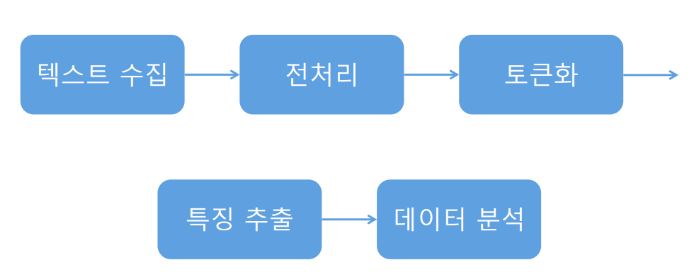

## 1. 단어 빈도 분석
- 워드 카운드 : 단어의 빈도를 측정하여 분석

### 데이터 수집 및 로딩

- https://github.com/smilegate-ai/korean_unsmile_dataset
- 스마일게이트의 한국어 혐오표현 데이터 셋 활용

In [ ]:
# 현재 작업 디렉토리 및 폴더 확인
import os
print(os.getcwd())
print(os.listdir(os.getcwd()))

In [ ]:
# 작업 디렉토리 변경
%cd "./drive/MyDrive/Colab Notebooks/텍스트마이닝"

In [3]:
import pandas as pd

In [37]:
# 훈련용 데이터, 평가용 데이터 로딩
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", delimiter="\t")
test = pd.read_csv("./data/unsmile_valid_v1.0.tsv", delimiter="\t")

In [ ]:
display(train.head())
display(test.head())

In [7]:
# 결측치 확인
display(train.isnull().info())
display(test.isnull().info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   문장      15005 non-null  bool 
 1   여성/가족   15005 non-null  bool 
 2   남성      15005 non-null  bool 
 3   성소수자    15005 non-null  bool 
 4   인종/국적   15005 non-null  bool 
 5   연령      15005 non-null  bool 
 6   지역      15005 non-null  bool 
 7   종교      15005 non-null  bool 
 8   기타 혐오   15005 non-null  bool 
 9   악플/욕설   15005 non-null  bool 
 10  clean   15005 non-null  bool 
 11  개인지칭    15005 non-null  bool 
dtypes: bool(12)
memory usage: 176.0 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   문장      3737 non-null   bool 
 1   여성/가족   3737 non-null   bool 
 2   남성      3737 non-null   bool 
 3   성소수자    3737 non-null   bool 
 4   인종/국적   3737 non-null   bool 
 5   연령      3737 non-null   bool 
 6   지역      3737 non-null   bool 
 7   종교      3737 non-null   bool 
 8   기타 혐오   3737 non-null   bool 
 9   악플/욕설   3737 non-null   bool 
 10  clean   3737 non-null   bool 
 11  개인지칭    3737 non-null   bool 
dtypes: bool(12)
memory usage: 43.9 KB


None

### 특정 혐오표현에서 많이 사용되는 단어를 확인하고 시각화

In [ ]:
text_train = train[train["악플/욕설"] == 1]["문장"]  # 특정 혐오표현 텍스트가 들어 있는 문장열 추출
text_train

In [26]:
# 띄어쓰기 중심으로 토큰화 : nltk 패키지 활용
from nltk import word_tokenize
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
words = word_tokenize(list(text_train.values)[0])
words

In [101]:
# 띄어쓰기 중심으로 토큰화 : python code 활용
badword_tokens = [t for doc in text_train for t in doc.split(" ")]

In [ ]:
badword_tokens

In [29]:
# 단어의 빈도 세기
from collections import Counter

In [30]:
counter = Counter(badword_tokens)  # 같은 단어들의 갯수 세기

In [ ]:
counter.most_common(40)

In [ ]:
# 워드클라우드를 위한 한글폰트 설치
!apt-get install -y fonts-nanum*
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install wordcloud

In [96]:
from wordcloud import WordCloud

In [97]:
# 객체 생성
wc = WordCloud(background_color="white",  # 배경색 설정
               random_state=715,  # 난수 seed 고정
               font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf")

In [102]:
input_str = " ".join(badword_tokens)  # 쪼개진 토큰들을 하나의 문자열로 병합

In [103]:
wc_rs = wc.generate_from_text(input_str)  # 문자열로부터 워드클라우드 생성

In [42]:
# matplotlib을 이용한 시각화
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')  # 다운받은 폰트를 maplotlib의 폰트로 설정

In [104]:
from PIL import Image, ImageFilter
wc_image = wc_rs.to_image()
blurred_image = wc_image.filter(ImageFilter.GaussianBlur(radius=7))  # 블러처리

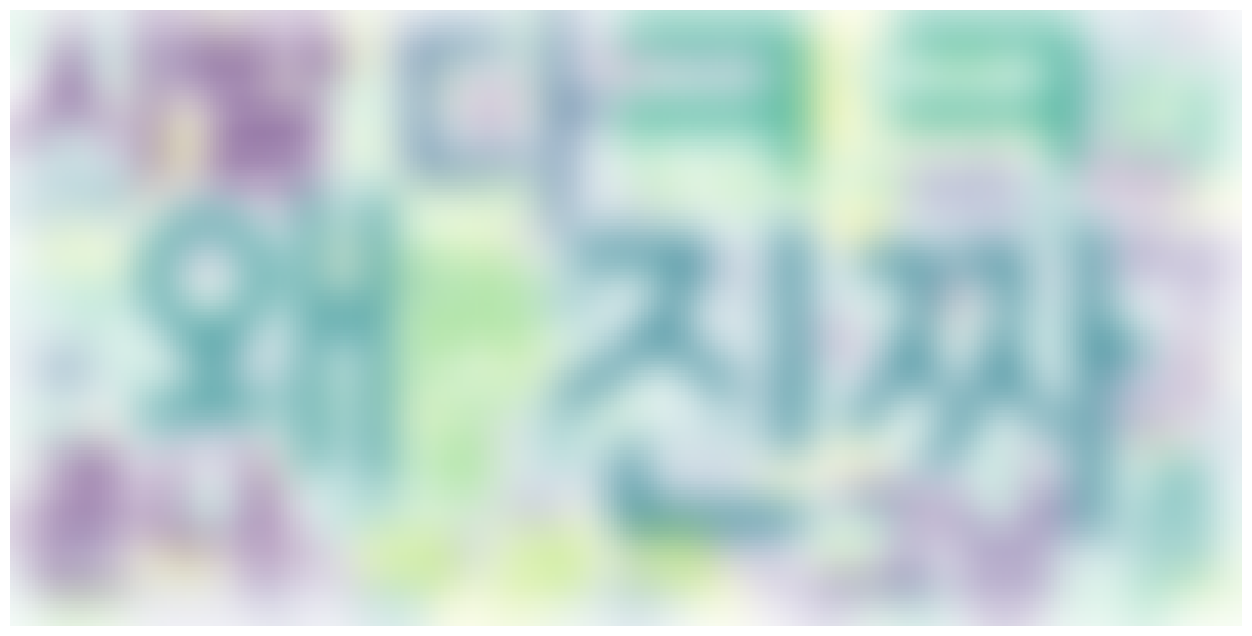

In [44]:
plt.figure(figsize=(20, 8))  # 그림을 그리는 그림판 셋팅
plt.imshow(blurred_image)
plt.axis('off')  # 눈금X
plt.show()

## 2. 감성분석

### 데이터 전처리
- ㅋㅋㅋㅋ, ㅎㅎㅎ 같은 정해진 횟수 없이 반복되는 글자 삭제
- 한 글자 단어 삭제(의미 부여가 어려운 단어라고 가정)

#### 1) 정규표현식(Regular Expression)
- 특정한 패턴(규칙)을 가진 문자열의 집합을 표현하는 언어
- 핸드폰 번호나 이메일처럼 패턴이 있는 문자열의 검색과 치환을 위해 프로그래밍 언어에서 대부분 지원하고 있다
- https://wikidocs.net/21703

In [35]:
import re # 정규표현식 사용 모듈 로딩

In [26]:
# 전화번호 검출 예시
p = re.compile("010-?[0-9]{4}-?\\d{4}")

In [27]:
p.search("전화번호 : 010-1234-5678")

<re.Match object; span=(7, 20), match='010-1234-5678'>

In [28]:
p.search("010-010-010")

#### 2) 혐오표현 데이터 클렌징

In [32]:
from tqdm import tqdm  # 반복 횟수를 시각화하고 예상 시간을 계산

In [43]:
# 패턴생성
p = re.compile("[ㅋㅎㄷㅇ~!?.\\-ㅡ0-9a-z]+")
train_clean = [] # 전처리된 전체 텍스트를 담을 리스트
for doc in tqdm(train['문장']) : # 약 1만 5천 번 반복
  temp = [] # 전처리된 문장의 토큰들이 들어갈 리스트
  for token in doc.split(" ") : # 한개의 문장을 토큰화하여 반복
    if len(token) < 2 : # 1글자 제거
      continue
    if p.search(token) : # 정규표현식 패턴에 매칭되는지 확인
      continue
    temp.append(token)
  train_clean.append(" ".join(temp)) # 정상적인 토큰을 전체리스트에 추가


100%|██████████| 15005/15005 [00:00<00:00, 115478.04it/s]


In [42]:
# 패턴생성
p = re.compile("[ㅋㅎㄷㅇ~!?.\\-ㅡ0-9a-z]+")
test_clean = [] # 전처리된 전체 텍스트를 담을 리스트
for doc in tqdm(test['문장']) : # 약 1만 5천 번 반복
  temp = [] # 전처리된 문장의 토큰들이 들어갈 리스트
  for token in doc.split(" ") : # 한개의 문장을 토큰화하여 반복
    if len(token) < 2 : # 1글자 제거
      continue
    if p.search(token) : # 정규표현식 패턴에 매칭되는지 확인
      continue
    temp.append(token)
  test_clean.append(" ".join(temp)) # 정상적인 토큰을 전체리스트에 추가


100%|██████████| 3737/3737 [00:00<00:00, 133717.64it/s]


#### 3) 정규표현식 re 모듈을 이용한 교체

In [32]:
# 반복글자 패턴 검출 및 교체
re.sub("[ㅋㅎㄷㅇ~!?.-ㅡ0-9a-z]+", "", "ㅋㅋㅋㅋㅋㅋㅋ안녕!!!!")

'안녕'

In [33]:
# 한 글자 패턴 검출 및 교체
re.sub(" \\w ", "", " 안 녕하세요!!!")

'녕하세요!!!'

#### 4) 형태소 분석
- Konlpy : https://konlpy.org/ko/latest/index.html
- Kiwi : https://github.com/bab2min/kiwipiepy
- PORORO : https://github.com/kakaobrain/pororo

##### konlpy
- 형태소 분석
- 토큰화
- 한국어 자연어 처리 : 한국어에 특화된 자연어 처리
- 품사 분류가 비교적 단순
- 신조어, 줄임말, 외래어 등의 분석이 매우 용이(Okt)

In [ ]:
!pip install konlpy

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
%cd Mecab-ko-for-Google-Colab

In [ ]:
!bash install_mecab-ko_on_colab_light_220429.sh

In [29]:
from konlpy.tag import Okt, Kkma, Mecab

In [30]:
okt = Okt()  # 트위터 기반으로 시작된 형태소 분석기 비교적 신조어에 강한 편
kkma = Kkma() # 속도는 느리지만, 품사태깅이 디테일하다
mecab = Mecab() # 처리 속도가 빠르다

In [41]:
# 형태소로 분리
okt.morphs("아버지가 방에 들어가신다.")

['아버지', '가', '방', '에', '들어가신다', '.']

In [42]:
# 형태소 분리 후 품사 부착
okt.pos("어제는 저녁을 맛있게 먹었다.")

[('어제', 'Noun'),
 ('는', 'Josa'),
 ('저녁', 'Noun'),
 ('을', 'Josa'),
 ('맛있게', 'Adjective'),
 ('먹었다', 'Verb'),
 ('.', 'Punctuation')]

In [43]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [44]:
# 토큰 정규화, 어근 추출
okt.pos("어제는 저녁을 맛있게 먹었닼ㅋㅋㅋㅋㅋ", norm=True, stem=True)

[('어제', 'Noun'),
 ('는', 'Josa'),
 ('저녁', 'Noun'),
 ('을', 'Josa'),
 ('맛있다', 'Adjective'),
 ('먹다', 'Verb'),
 ('ㅋㅋㅋ', 'KoreanParticle')]

In [45]:
# 명사 추출
kkma.nouns("아버지 가방에 들어가신다.")

['아버지', '가방']

In [ ]:
kkma.tagset  # 심화 분석

In [47]:
# kkma -> 느리다
# 클렌징한 데이터를 형태소 단위로 분리
# konlpy_morphs_tmp = []  # 형태소로 분리된 전체 데이터가 들어갈 리스트
# for doc in tqdm(train_clean):  # 1만 5천번 반복
#   rs = kkma.morphs(doc)  # 형태소로 분리
#   konlpy_morphs_tmp.append(" ".join(rs))  # 리스트에 추가

In [54]:
# test 데이터
# 클렌징한 데이터를 형태소 단위로 분리
konlpy_morphs_train = []  # 형태소로 분리된 전체 데이터가 들어갈 리스트
for doc in tqdm(train_clean):  # 1만 5천번 반복
  rs = mecab.morphs(doc)  # 형태소로 분리
  konlpy_morphs_train.append(" ".join(rs))  # 리스트에 추가

100%|██████████| 15005/15005 [00:01<00:00, 9410.98it/s] 


In [53]:
# train 데이터
konlpy_morphs_test = []
for doc in tqdm(test_clean):
  rs = mecab.morphs(doc)
  konlpy_morphs_test.append(" ".join(rs))

100%|██████████| 3737/3737 [00:02<00:00, 1467.51it/s]


In [ ]:
konlpy_morphs_train

##### Kiwi
- 속도가 괜찮다
- 간단한 오타의 경우 스스로 교정
- 한국어 특유의 복잡한 문법와 어휘를 처리하는 데 최적화


In [ ]:
!pip install kiwipiepy

In [52]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [53]:
kiwi.tokenize("아버지 가방에 들어가신다.")

[Token(form='아버지', tag='NNG', start=0, len=3),
 Token(form='가방', tag='NNG', start=4, len=2),
 Token(form='에', tag='JKB', start=6, len=1),
 Token(form='들어가', tag='VV', start=8, len=3),
 Token(form='시', tag='EP', start=11, len=1),
 Token(form='ᆫ다', tag='EF', start=11, len=2),
 Token(form='.', tag='SF', start=13, len=1)]

#### 5) 불용어 처리(stop word)
- 분석 시 필요 없는, 의미가 없는 토큰들을 제거하는 행위

In [54]:
from kiwipiepy.utils import Stopwords
stopwords = Stopwords()  # 객체생성
kiwi.tokenize("분석 결과에서 불용어만 제외하고 출력할 수도 있다.", stopwords=stopwords)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='결과', tag='NNG', start=3, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

In [55]:
stopwords.add(("결과", "NNG"))  # 새로운 불용어 등록

In [56]:
kiwi.tokenize("분석 결과에서 불용어만 제외하고 출력할 수도 있다.", stopwords=stopwords)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

#### 6) 띄어쓰기 교정
- https://bab2min.github.io/kiwipiepy/v0.15.0/kr/#kiwipiepy.Kiwi.space

In [57]:
kiwi.space("띄어쓰기없이작성된텍스트네이걸교정 해")

'띄어쓰기 없이 작성된 텍스트네 이걸 교정해'

#### 7) 이모지 제거

In [ ]:
!pip install emoji

In [59]:
import emoji

In [60]:
emoji.replace_emoji(":) 하하하하 재밌다 !!! 😀")

':) 하하하하 재밌다 !!! '

### 토큰화 및 수치화
- 토큰화 : 일정 단위로 텍스트를 분리하는 작업
  - 단어(띄어쓰기)
  - 글자(char)
  - n-gram(유니, 바이, 트라이 등)
  - 기타(형태소, 품사 등)
- 수치화(특성 추출) : 의미있는 정보를 담고 있는 숫자 형태로 변환하는 방법, 데이터를 정형화하는 효과가 있다
  - 라벨인코딩
  - BOW
  - Tf-idf
  - Word embedding

#### 1) BOW(Bag Of Word)
- 문장에서 특정 단어의 등장 빈도를 수치화하는 방법
- 특징
  - 문장에서 단어의 순서를 고려하지 않는다(문맥x)
  - 말뭉치에서 사용되는 단어가 많으면 부피가 비례해서 커진다
- 단점 : 희소한 데이터의 형태가 나올 수 있다(너무 부피가 커질 수 있다), 단어의 의미를 표현하지 못한다 -> <U>Word embedding</U> 활용

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
sample_text = ["나는 오늘 저녁에 치킨을 먹을꺼야",
               "너는 오늘 저녁에 무엇을 먹을꺼니?",
               "나는 오늘 아침에 운동을 하고 왔어",
               "어제 저녁에 운동을 했더니 배가 많이 고프다"]

In [15]:
# step 1 : 단어사전 구축
sample_cv = CountVectorizer()
sample_cv.fit(sample_text)


CountVectorizer()

In [16]:
# 단어사전 확인
sample_cv.vocabulary_

{'나는': 1,
 '오늘': 10,
 '저녁에': 13,
 '치킨을': 14,
 '먹을꺼야': 5,
 '너는': 2,
 '무엇을': 6,
 '먹을꺼니': 4,
 '아침에': 8,
 '운동을': 12,
 '하고': 15,
 '왔어': 11,
 '어제': 9,
 '했더니': 16,
 '배가': 7,
 '많이': 3,
 '고프다': 0}

In [17]:
# step 2 : 단어사전을 기반으로 각 문장에서 단어의 빈도를 세어 표현
result = sample_cv.transform(sample_text)

In [18]:
result.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1]])

In [19]:
# 단어사전을 데이터프레임으로 변환
result_df = pd.DataFrame([sample_cv.vocabulary_.keys()],
                         columns = sample_cv.vocabulary_.values())
result_df = result_df.sort_index(axis=1)  # 컬럼을 기준으로 정렬
result_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,고프다,나는,너는,많이,먹을꺼니,먹을꺼야,무엇을,배가,아침에,어제,오늘,왔어,운동을,저녁에,치킨을,하고,했더니


In [20]:
pd.concat([result_df, pd.DataFrame(result.toarray())])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,고프다,나는,너는,많이,먹을꺼니,먹을꺼야,무엇을,배가,아침에,어제,오늘,왔어,운동을,저녁에,치킨을,하고,했더니
0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0
3,1,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1


#### 2) Tf-idf
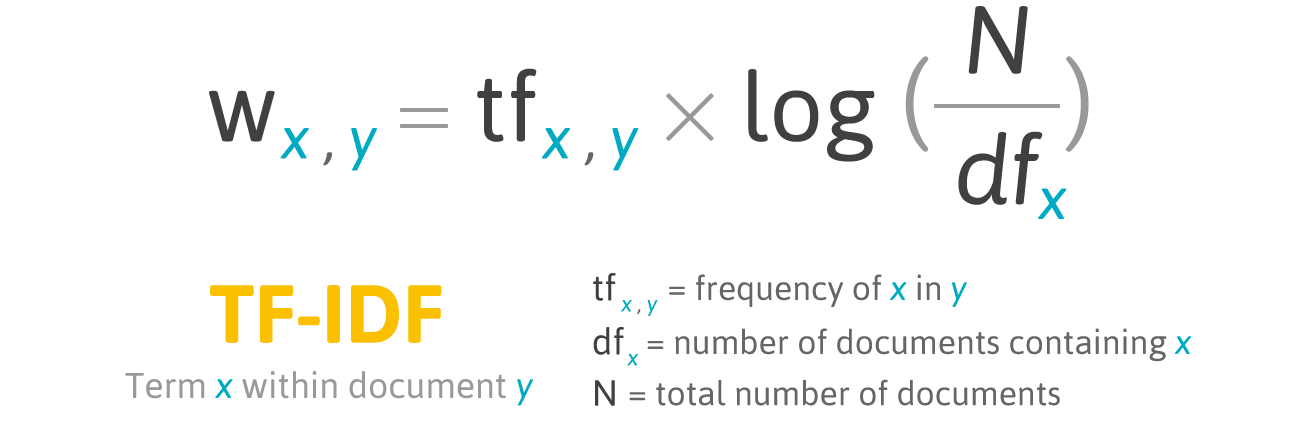

- 말뭉치(corpus) : 텍스트마이닝,자연어처리 분야에서 학습을 위해 사용하는 데이터셋
- 문서(document) : 말뭉치에서 각 샘플을 치징하는 단어
- TF(Term Frequency) : 하나의 문서(document)에서 개별 단어들이 등장하는 빈도 수 -> 높을 수록 좋다
- DF(Document Frequency) : 하나의 단어(토큰)가 전체 말뭉치에서 등장하는 문서(document) 수

=> 특정 단어가 문서 내에서 얼마나 중요한지를 측정

- 장점 : BoW 보다 더 높은 정확성
- 단점 : 단어의 빈도로 판단할 뿐 맥락적 유사도는 반영하지 못함

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
sample_tf_idf = TfidfVectorizer()
sample_tf_idf.fit(sample_text)

TfidfVectorizer()

In [49]:
len(sample_tf_idf.vocabulary_)  # 단어사전 구축

17

In [50]:
sample_tf_idf.transform(sample_text).toarray()  # tf-idf 방식으로 수치화

array([[0.        , 0.42530476, 0.        , 0.        , 0.        ,
        0.53944516, 0.        , 0.        , 0.        , 0.        ,
        0.34432086, 0.        , 0.        , 0.34432086, 0.53944516,
        0.        , 0.        ],
       [0.        , 0.        , 0.51199172, 0.        , 0.51199172,
        0.        , 0.51199172, 0.        , 0.        , 0.        ,
        0.32679768, 0.        , 0.        , 0.32679768, 0.        ,
        0.        , 0.        ],
       [0.        , 0.36559366, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.46370919, 0.        ,
        0.29597957, 0.46370919, 0.36559366, 0.        , 0.        ,
        0.46370919, 0.        ],
       [0.40726515, 0.        , 0.        , 0.40726515, 0.        ,
        0.        , 0.        , 0.40726515, 0.        , 0.40726515,
        0.        , 0.        , 0.32109252, 0.25995207, 0.        ,
        0.        , 0.40726515]])

#### 3) Word Embedding
- 인공지능 학습 기반
- 단어를 벡터로 표현하는 방법 -> 단어를 밀집 표현으로 변환
- 장점
  - 밀집된 공간(특정 크기)에 표현되게 한다
  - 훨씬 압축된 단어의 의미를 내포하는 숫자가 도출


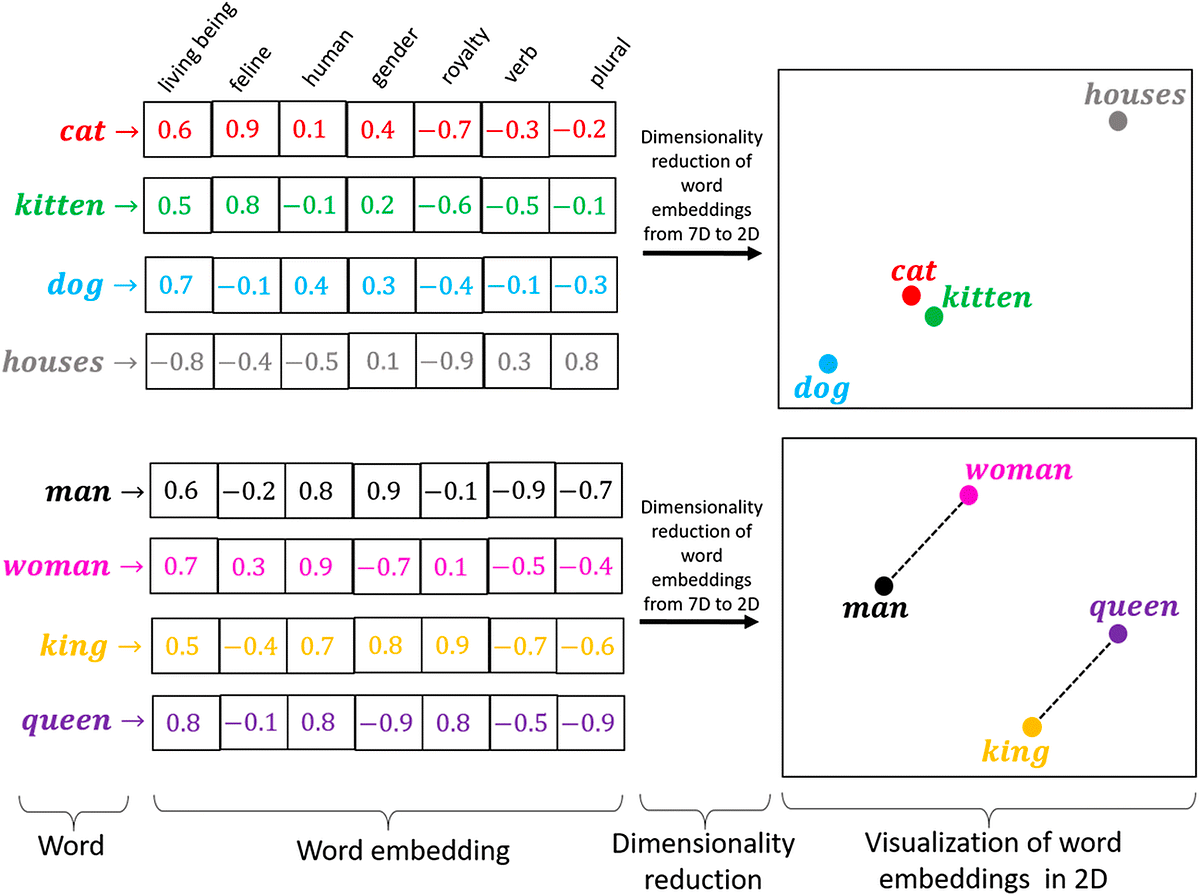

In [ ]:
# 임베딩을 목적으로 만들어진 모델
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

In [25]:
embedding = model.encode(sample_text)

In [26]:
embedding.shape

(4, 384)

#### 혐오표현데이터 토큰화 및 수치화

In [47]:
unsmile_cv = CountVectorizer(stop_words=["으로", "이다", "하고", "부터"],  # 불용어 등록
                             ngram_range=(1, 2),  # n-gram 설정(2단어까지 고려)
                             max_df=0.7,  # 최대 등장 빈도/과도하게 등장하는 단어 제한(90%) / 유효한 속성은 아니다
                             min_df=10   # 최소 등장 빈도 / 빈도가 너무 낮으면 제한(10개 문서 이상 등장해야, 오타가 제거되는 간접적인 효과 )
                             )
unsmile_tf_idf = TfidfVectorizer(stop_words=["으로", "이다", "하고", "부터"],
                                 ngram_range=(1, 2),
                                 max_df=0.7,
                                 min_df=10)
unsmile_transformer_model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")

In [55]:
# 단어사전 구축
unsmile_cv.fit(konlpy_morphs_train)
unsmile_tf_idf.fit(konlpy_morphs_train)

TfidfVectorizer(max_df=0.7, min_df=10, ngram_range=(1, 2),
                stop_words=['으로', '이다', '하고', '부터'])

In [56]:
len(unsmile_cv.vocabulary_) # 단어사전의 크기

1834

In [ ]:
unsmile_cv.vocabulary_

In [57]:
X_train_BOW = unsmile_cv.transform(konlpy_morphs_train)
X_test_BOW = unsmile_cv.transform(konlpy_morphs_test)
display(X_train_BOW)
display(X_test_BOW)

<15005x1834 sparse matrix of type '<class 'numpy.int64'>'
	with 73169 stored elements in Compressed Sparse Row format>

<3737x1834 sparse matrix of type '<class 'numpy.int64'>'
	with 17570 stored elements in Compressed Sparse Row format>

In [58]:
X_train_tf_idf = unsmile_tf_idf.transform(konlpy_morphs_train)
X_test_tf_idf = unsmile_tf_idf.transform(konlpy_morphs_test)
display(X_train_tf_idf)
display(X_test_tf_idf)

<15005x1834 sparse matrix of type '<class 'numpy.float64'>'
	with 73169 stored elements in Compressed Sparse Row format>

<3737x1834 sparse matrix of type '<class 'numpy.float64'>'
	with 17570 stored elements in Compressed Sparse Row format>

In [83]:
# 시간이 너무 오래 걸린다 -> GPU 자원을 이용하면 더 빠름
# X_train_embedding = []
# for doc in tqdm(konlpy_morphs_train):
#   rs = unsmile_transformer_model.encode(doc)
#   X_train_embedding.append(rs)

In [84]:
# 같은 내용
# X_train_embedding = unsmile_transformer_model.encode(konlpy_morphs_train)

#### 사전에 뽑아 놓은 pickle을 이용

In [59]:
import pickle

In [60]:
with open("./data/X_train_setence_transformer3.pkl", "rb") as f:
  X_train_embedding = pickle.load(f)
with open("./data/X_test_setence_transformer3.pkl", "rb") as f:
  X_test_embedding = pickle.load(f)

In [62]:
X_train_embedding = pd.DataFrame(X_train_embedding)
X_test_embedding = pd.DataFrame(X_test_embedding)

In [63]:
X_train_embedding.shape, X_test_embedding.shape

((15005, 768), (3737, 768))

### 모델링
- 문장이 들어왔을 때 분류할 수 있는 모델 만들기
- 고객 VOC 데이터
  - 일부 데이터 추출 후 라벨링 진행
  - 나머지 데이터를 자동으로 분류하는 task 가능

#### 정답 데이터 추출

In [64]:
train['y'] = train.loc[:, "여성/가족": "clean"].values.argmax(axis=1)  # 최댓값의 위치 -> 라벨로 만든다
test['y'] = test.loc[:, "여성/가족": "clean"].values.argmax(axis=1)

In [ ]:
train

In [66]:
# 혐오표현에 대해 라벨링 진행
y_train = train['y']
y_test = test['y']

#### 모델 학습 및 평가(교차검증: cross validation)
- 테스트 데이터를 여러 개 가져가는 것이 좋다 -> 안정화된 평가
- 평가를 여러번 할 만큼 데이터를 충분히 가지고 있는가? -> 아닌 경우가 많다 => cross validation 활용
- train 데이터를 여러 조각으로 split
- 첫 번째 학습 및 평가를 할 때 2~5번 조각 활용 / 1번 조각을 검증 할 때 사용 -> 총 5번 test가 가능하다
- final test 시 test data 사용
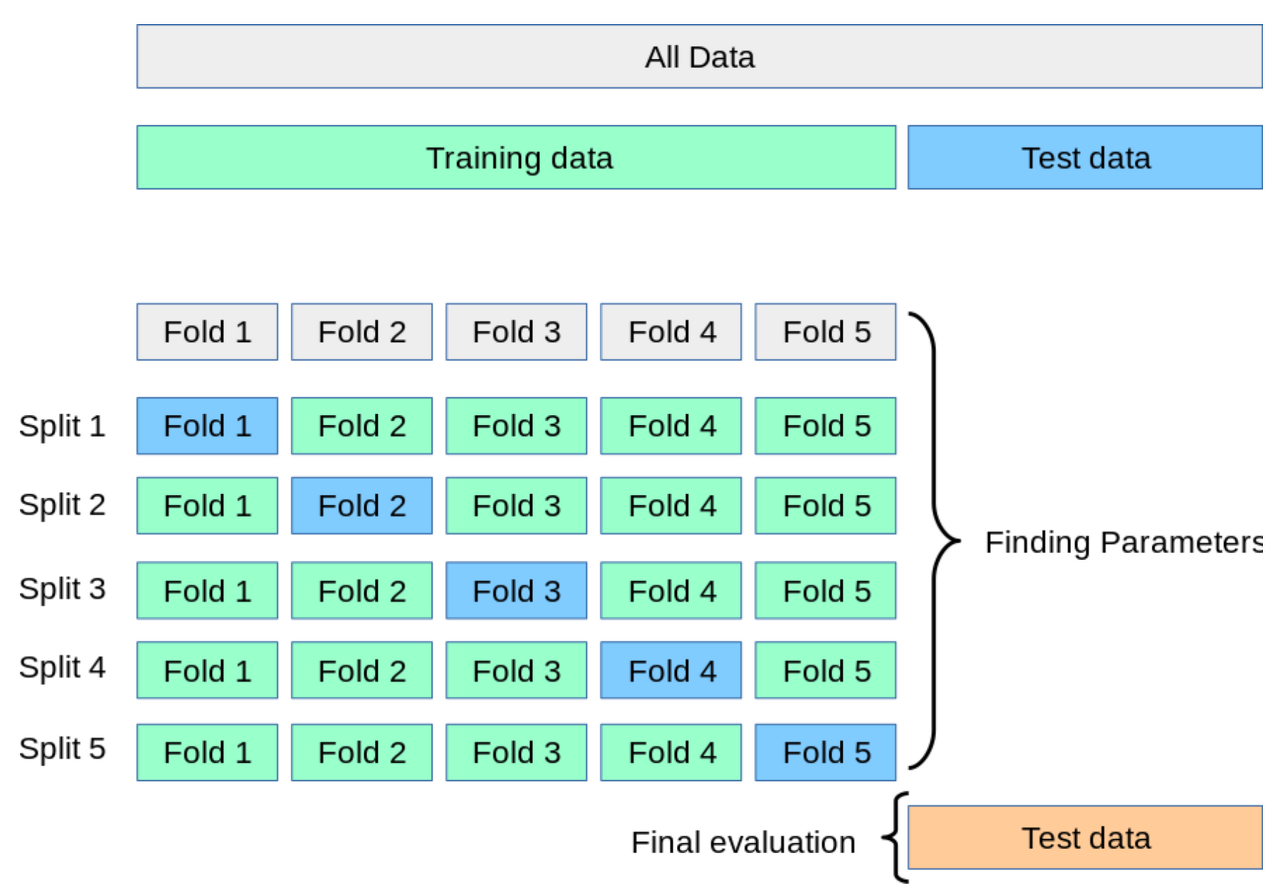

In [67]:
from sklearn.linear_model import LogisticRegression # 선형분류모델
from sklearn.model_selection import cross_val_score # 교차검증 함수

#### 텍스트 마이닝에서의 선형분류

- x값 : 단어의 빈도

- y값 : 가중치

-> 혐오표현을 분류하는 데 있어서 해당 단어가 얼마나 예측에 영향을 많이 주는지 조정한다

-> w(가중치)를 찾아가는 과정

<br>

**Q.** Embedding은 시간이 오래 걸린다. 이유는??

**A.** 수치화 했을 때, 데이터들의 차이
- BOW/Tf-idf : 0이 많이 들어가 있는 데이터 셋/사용되지 않는 토큰들이 많다. -> 상대적으로 계산량이 적다
- Embedding : 밀집된 벡터 안에 숫자를 눌러 담는다 -> 특성들을 전부 반영한다 -> 계산량이 많다 / 성능이 더 좋다




In [68]:
logi = LogisticRegression(max_iter=1000)  # w를 찾기 위해 반복적인 작업을 진행한다 -> max_iter : 최대 반복횟수

In [69]:
# BOW 교차검증
score_BOW = cross_val_score(logi, X_train_BOW, y_train, cv=5)  # y_train을 넣어서 교차검증 5번
score_BOW

array([0.56681106, 0.54981673, 0.56347884, 0.55448184, 0.57380873])

In [70]:
# 로지스텍 모델이 맞추는 퍼센트 56%
score_BOW.mean()

0.5616794401866044

In [71]:
# Tf-idf 교차검증
score_tf_idf = cross_val_score(logi, X_train_tf_idf, y_train, cv=5)
score_tf_idf

array([0.55581473, 0.54248584, 0.56081306, 0.54715095, 0.56647784])

In [72]:
score_tf_idf.mean()

0.5545484838387205

In [ ]:
# Embedding 교차검증
score_embedding = cross_val_score(logi, X_train_embedding, y_train, cv=5)
score_embedding

In [74]:
score_embedding.mean()

0.6050649783405533

#### 하이퍼파라미터 튜닝(Hyperparameter Tuning)
- 모델의 주요 파라미터를 수정하여 최적화하는 기법

In [75]:
# Tf-idf와 logistic 두 개를 튜닝
# 하나의 파이프라인으로 묶어서 튜닝
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [76]:
# 입력 순서대로 데이터 생성
unsmile_pipeline = Pipeline([
    ("unsmile_tf_idf", TfidfVectorizer()),
    ("unsmile_logi", LogisticRegression()),
])

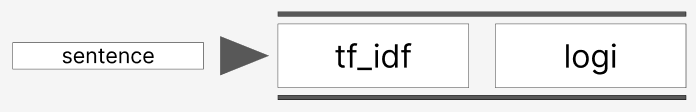

In [77]:
grid_params = {
    "unsmile_tf_idf__max_df": [0.5, 0.8, 0.7],  # max_df 세 가지 케이스 test
    "unsmile_tf_idf__min_df": [3, 5, 7, 10],
    "unsmile_tf_idf__ngram_range": [(1, 1), (1, 2), (1, 3)] # uni, bi, tri test
}

In [78]:
grid = GridSearchCV(unsmile_pipeline,  # 테스트할 모델
                    grid_params,  # 테스트할 파라미터 조합
                    cv = 3,  # 교차검증 횟수
                    n_jobs = -1)  # PC의 자원을 최대화

# 총 3*3*4 * 3(교차검증)번 연산

In [ ]:
grid.fit(konlpy_morphs_train, y_train)  # 수치화가 내장되어 있음

In [80]:
# best score
grid.best_score_

0.5514167991405051

In [81]:
# best param 조합
grid.best_params_

{'unsmile_tf_idf__max_df': 0.5,
 'unsmile_tf_idf__min_df': 10,
 'unsmile_tf_idf__ngram_range': (1, 2)}

In [82]:
# best model
best_model = grid.best_estimator_
print(best_model)

Pipeline(steps=[('unsmile_tf_idf',
                 TfidfVectorizer(max_df=0.5, min_df=10, ngram_range=(1, 2))),
                ('unsmile_logi', LogisticRegression())])


In [83]:
# best model 저장
with open("/.best_unsmile_model.pkl", "wb") as f:
  pickle.dump(best_model, f)

#### 테스트 데이터 활용 평가 및 시각화

In [84]:
# 분류평가지표 리포팅
from sklearn.metrics import classification_report

In [85]:
y_pre = best_model.predict(konlpy_morphs_test)
print(classification_report(y_test, y_pre))  # 실제, 예측

              precision    recall  f1-score   support

           0       0.66      0.52      0.58       394
           1       0.79      0.58      0.67       325
           2       0.82      0.58      0.68       261
           3       0.70      0.59      0.64       387
           4       0.85      0.24      0.37       122
           5       0.81      0.65      0.72       222
           6       0.79      0.56      0.65       223
           7       0.40      0.07      0.12        82
           8       0.43      0.46      0.44       786
           9       0.48      0.74      0.59       935

    accuracy                           0.57      3737
   macro avg       0.67      0.50      0.55      3737
weighted avg       0.61      0.57      0.57      3737



- accuracy(정확도) 57%
- 각 클래스 별로의 정확도(0번~9번 라벨링)
  - 클래스별로 정확도가 다르다
- f1-score : 1에 가까울 수록 분류 성능이 좋다


=> 취약한 클래스를 뺄 것인지, 데이터를 보완할 것인지 등 정확도를 높이기 위한 의사 결정을 진행한다


In [86]:
print(best_model.steps[0])
print(best_model.steps[1])

('unsmile_tf_idf', TfidfVectorizer(max_df=0.5, min_df=10, ngram_range=(1, 2)))
('unsmile_logi', LogisticRegression())


In [87]:
# 10개의 클래스 중 그나마 가장 성능이 좋은 5번(지역 관련 내용)을 시각화
# 단어사전 추출
unsmile_vocab = best_model.steps[0][1].vocabulary_

# 가중치 추출
unsmile_weight = best_model.steps[1][1].coef_

In [88]:
# df로 정리
unsmile_df = pd.DataFrame([unsmile_vocab.keys(), unsmile_vocab.values()]).T
unsmile_df.sort_values(by=1, inplace=True)  # 정렬된 상태로 저장
unsmile_df["w"] = unsmile_weight[5]  # 5클래스 가중치 column 생성


unsmile_df.columns = ['단어', '인덱스', '가중치']
unsmile_df.set_index('인덱스', inplace=True)
unsmile_df

,단어,가중치
인덱스,,
0,is,-0.126101
1,pc,-0.197627
2,ㅆㅂ,0.078410
3,ㅆㅅㅌㅊ,-0.407123
4,ㅉㅉ,0.410251
...,...,...
1838,희망,-0.094879
1839,희생,-0.141452
1840,힘내,-0.131070


In [ ]:
unsmile_df.sort_values(by='가중치', ascending=False).head(30)

In [118]:
!pip install squarify

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import squarify
from io import BytesIO

# 높은 해상도로 폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBamkend.figure_format = 'retina'

# matplotlib가 사용하는 폰트 경로 확인
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 폰트 경로를 전달해 폰트이름을 가져옴
font_name = fm.FontProperties(fname=fontpath, size=10).get_name()

# matplotlib가 사용할 글꼴을 나눔바른고딕으로 변경
plt.rc('font', family=font_name)

# plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['font.size'] = 15

sizes = unsmile_df.sort_values(by='가중치', ascending=False).head(30)['가중치']
labels= unsmile_df.sort_values(by='가중치', ascending=False).head(30)['단어']

# 빈도값을 0~1까지 값을 갖도록 min-max 표준화
norm = matplotlib.colors.Normalize(vmin=min(sizes),
                            vmax=max(sizes))

# 정규화된 값을 matplotlib의 cm(color map)에서 Blue 에 적용
colors = [matplotlib.cm.Reds(norm(value)) for value in sizes]

squarify.plot(sizes, 10, 10, label=labels, color=colors,
              bar_kwargs=dict(linewidth=8, edgecolor="#eee"))
plt.title("지역혐오에 활용되는 주요 키워드")
plt.axis('off')


# 그래프를 이미지로 저장
plt.savefig('temp_plot.png', bbox_inches='tight', dpi=300)

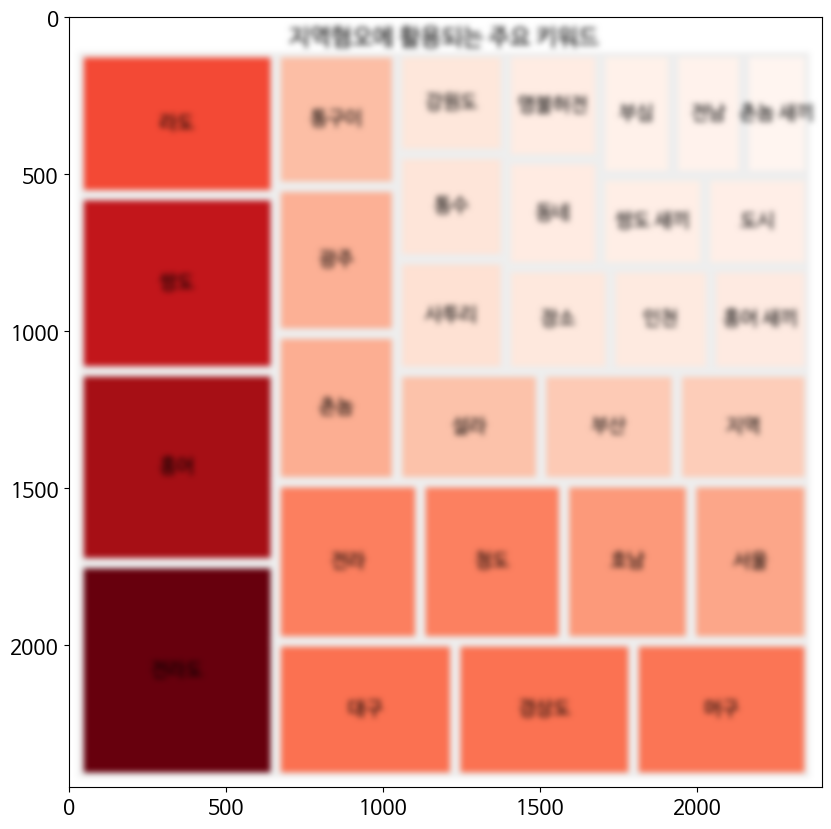

In [105]:
# 블러 처리
image = Image.open('temp_plot.png')
blurred_image = image.filter(ImageFilter.GaussianBlur(radius=9))
plt.imshow(blurred_image)

## 3. 연관성(유사도)분석

### 유사도(Similarity)

#### Euclidean Distance
- 피타고라스의 정리를 기반으로 두 점의 거리를 계산하는 알고리즘
- Data scale에 민감하다
  - Data scale이 큰 특성에 대해 영향을 많이 받는다.
  - scaling을 잘 해야 한다.
- 희소한(sparse)한 데이터에는 잘 동작하지 않음
  - BOW, Tf-idf에서는 잘 작동하지 않을 수 있다.
  - 0이 많음
- 특성 두가지를 가지고 계산한다
  

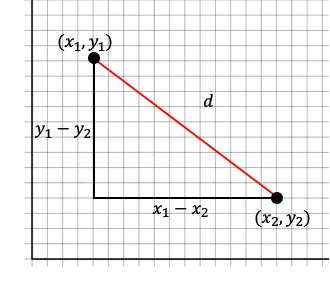

In [139]:
# 유클리디언 유사도 공식
import numpy as np

def euclidean_sim(A, B):
    return ((A-B)**2).sum()**0.5

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([3,0,3,3])

# 데이터 스케일에 민감하다
print('문서 1과 문서2의 유사도 :',euclidean_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',euclidean_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',euclidean_sim(doc2, doc3))

# => 값이 작을 수록 유사하다 -> 1번, 2번의 문서가 유사하다
# 그런데 텍스트마이닝 관점에서는 단어의 등장빈도에 비례해서 거리값이 바뀔 수 있다.
# 따라서 유클리디언 유사도 공식보다 "코사인 유사도"를 선호

문서 1과 문서2의 유사도 : 1.4142135623730951
문서 1과 문서3의 유사도 : 4.242640687119285
문서 2와 문서3의 유사도 : 3.4641016151377544


#### Cosine Similarity
- 두 벡터 사이 각도의 코사인으로 두 벡터의 유사성을 계산
- -1 ~ 1 사이값을 가짐
- 문장의 길이, 단어의 수 등에 덜 민감하여 <U>텍스트 마이닝에서 선호</U>

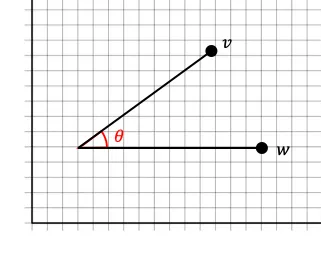

In [119]:
# 코사인 유사도 공식
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

# 2, 3이 비슷한 결을 가지고 있는 문서이다.

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


In [120]:
# 행렬 단위로 전체데이터 유사도를 구하는 함수
# from sklearn.metrics.pairwise import cosine_similarity

### 단어 연관성

#### Apriori algorithm(연관규칙분석)
- 두 아이템의 집합이 자주 일어나는지 확인

#### Word Embedding 활용
- 관련성 있는 단어는 문장에서 인접되게 나타난다는 특징을 학습하는 방법
- Word Embedding을 이용해 단어의 특징을 수치화하고 유사도를 계산
- Word2Vec, GloVe, FastText 등

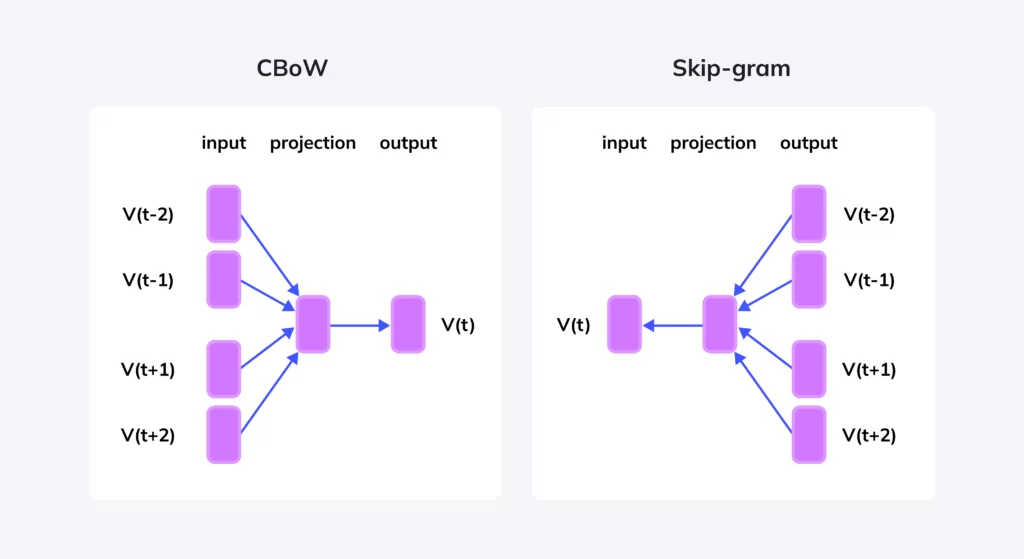


- CBOW : 주변에 있는 단어들을 입력으로 중간에 있는 단어들을 예측하는 방법
- Skip-gram : 중간에 있는 단어들을 입력으로 주변 단어들을 예측하는 방법
- embedding에서는 Skip-gram을 더 선호(데이터가 만들어지는 양이 많다)
- self-supervised learning(자기지도학습)의 일종
  - 문장만 있으면 문제와 답을 뽑아낸다.
  - 학습의 성능을 끌어올린다.
  - 정답을 라벨링하는 시간 줄임

In [ ]:
!pip install gensim

In [110]:
from gensim.models import Word2Vec

In [111]:
data = pd.read_csv("./data/naver_shopping.txt", delimiter="\t", header=None)
data.columns=['평점','리뷰']

In [112]:
# 형태소의 품사 반환
mecab.pos(data['리뷰'].iloc[0])

[('배공', 'NNG'), ('빠르', 'VA'), ('고', 'EC'), ('굿', 'NNG')]

In [125]:
mecab.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NNB': '의존 명사',
 'NNBC': '단위를 나타내는 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'SC': '구분자 , · / :',
 'SE': '줄임표 …',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SSC': '닫는 괄호 ), ]',
 'SSO': '여는 괄호 (, [',
 'SY': '기타 기호',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [113]:
# 명사와 형용사만 추출
total = [] # 형태소로 분리된 전체 문장이 들어갈 리스트
for doc in tqdm(data['리뷰']):
  rs = mecab.pos(doc)  # 품사를 부착하여 형태소 분석
  temp = [t[0] for t in rs if t[1] in ['VA', 'NNG']]  # 명사와 형용사만 걸러냄
  total.append(" ".join(temp))

100%|██████████| 200000/200000 [00:28<00:00, 7097.95it/s] 


In [114]:
total[:5]

['배공 빠르 굿',
 '택배 집 밑 층 말',
 '좋 바지 좋 구매 가격 대박 바느질 편하 성비 최고',
 '선물 전달 상품 머그 컵 당황 전화 배송 누락 확인 선물 배송 생각 같 아쉽',
 '민트 색상 옆 손잡이 용도 사용']

In [115]:
w2v = Word2Vec(window=3, # 인접된 단어의 영역을 결정하는 수
              min_count=5, # 학습단어로 설정하기 위한 최소 등장 횟수
              sg=1, # CBOW, Skip-gram 방식 결정
              vector_size=50, # 임베딩할 벡터 크기
              sentences=[doc.split(" ") for doc in total]) # 학습시킬 문장

In [116]:
# '배송'이라는 단어와 유사한 단어 20개
w2v.wv.most_similar("배송", topn=20)

[('도착', 0.8013381361961365),
 ('배소', 0.7928963899612427),
 ('배성', 0.7573427557945251),
 ('배달', 0.7569389939308167),
 ('점수', 0.7419787645339966),
 ('추석', 0.7370904684066772),
 ('제때', 0.73599773645401),
 ('수고', 0.73401939868927),
 ('일주일', 0.7296851873397827),
 ('연휴', 0.7281674146652222),
 ('발송', 0.7279695272445679),
 ('양호', 0.7266393899917603),
 ('통운', 0.7256278395652771),
 ('시국', 0.7255762219429016),
 ('신속', 0.7235058546066284),
 ('쪽지', 0.7205471992492676),
 ('주심', 0.7201632857322693),
 ('어제', 0.719043493270874),
 ('재품', 0.7182555794715881),
 ('당시', 0.7163726687431335)]

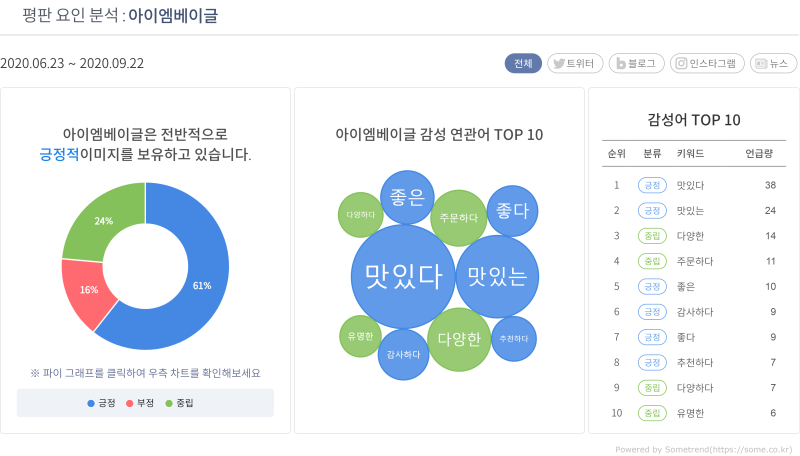

##### 단어 유사도 시각화
https://pyvis.readthedocs.io/en/latest/tutorial.html

In [ ]:
!pip install pyvis

In [117]:
keyword = "배송"
rs = w2v.wv.most_similar(keyword, topn=20)
rs

[('도착', 0.8013381361961365),
 ('배소', 0.7928963899612427),
 ('배성', 0.7573427557945251),
 ('배달', 0.7569389939308167),
 ('점수', 0.7419787645339966),
 ('추석', 0.7370904684066772),
 ('제때', 0.73599773645401),
 ('수고', 0.73401939868927),
 ('일주일', 0.7296851873397827),
 ('연휴', 0.7281674146652222),
 ('발송', 0.7279695272445679),
 ('양호', 0.7266393899917603),
 ('통운', 0.7256278395652771),
 ('시국', 0.7255762219429016),
 ('신속', 0.7235058546066284),
 ('쪽지', 0.7205471992492676),
 ('주심', 0.7201632857322693),
 ('어제', 0.719043493270874),
 ('재품', 0.7182555794715881),
 ('당시', 0.7163726687431335)]

In [120]:
from pyvis.network import Network
from IPython.display import HTML

In [121]:
# 노트북 안에서 그림이 그려지게 함
net = Network(notebook=True, cdn_resources='in_line')
net.add_node(keyword)  # 메인키워드 id='배송' / word를 id 값으로 인식

for word, sim in rs:
  net.add_node(word)  # word2vec을 이용해 도출한 연관단어 추가
  net.add_edge(word, keyword, value=sim)  # edge를 keyword와 연결

net.save_graph('my_graph.html')

In [140]:
HTML(filename="my_graph.html")

##### 긍정/부정 정보 추가

In [123]:
# 정답 데이터 생성(긍정-> 1, 부정 -> 0)
def labeling(row):
  if row['평점'] >= 4:
    return 1
  elif row['평점'] <= 2:
    return 0

In [124]:
data['label'] = data.apply(labeling, axis=1)

In [ ]:
data.head()

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [126]:
X_train, X_test, y_train, y_test = train_test_split(total,
                                                    data['label'])

In [127]:
naver_setiment_model = Pipeline([
    ("naver_tf_idf", TfidfVectorizer(token_pattern="(?u)\\b\\w+\\b")),  # 한글자도 인식
    ("naver_logi", LogisticRegression(max_iter=1000))
])

In [128]:
naver_setiment_model.fit(X_train, y_train)

Pipeline(steps=[('naver_tf_idf',
                 TfidfVectorizer(token_pattern='(?u)\\b\\w+\\b')),
                ('naver_logi', LogisticRegression(max_iter=1000))])

In [129]:
# 성능테스트
naver_setiment_model.score(X_test, y_test)

# => 82%에 대해 정확한 예측 수행

0.82274

In [130]:
# 단어사전 추출
naver_vocab = naver_setiment_model.steps[0][1].vocabulary_

# 단어 가중치 추출
naver_weight = naver_setiment_model.steps[1][1].coef_[0]

In [131]:
naver_weight

# => 가중치가 1보다 커야 긍정 리뷰로 분류된다

array([ 0.54945164,  0.2676703 ,  0.28082777, ..., -0.74232252,
       -0.49203794, -0.91914626])

In [132]:
naver_df = pd.DataFrame([naver_vocab.keys(), naver_vocab.values()]).T
naver_df.sort_values(by=1, inplace=True)
naver_df[2] = naver_weight
naver_df.columns = ['단어', '인덱스', '가중치']
naver_df

,단어,인덱스,가중치
441,ㄱ,0,0.549452
442,ㄴ,1,0.267670
444,ㄷ,2,0.280828
1547,ㄹ,3,0.852564
1501,ㅁ,4,0.916646
...,...,...,...
5315,힘없,17846,-0.870619
11757,힘있,17847,0.308104
4393,힘줄,17848,-0.742323
14710,힙합,17849,-0.492038


In [133]:
# 긍정단어 가중치 중심 상위 10개
naver_pos = naver_df.sort_values(by='가중치', ascending=False).head(10)
naver_pos

,단어,인덱스,가중치
47,최고,14973,6.247289
20,좋,13722,5.976958
24,맛있,4690,5.521723
144,만족,4636,5.108197
260,강추,430,4.472615
403,안심,9870,4.404588
50,빠르,7262,4.336802
206,친절,15211,4.171940
361,짱,14395,4.097904
18,감사,332,4.022274


In [134]:
# 부정단어 가중치 중심 상위 10개
naver_neg = naver_df.sort_values(by='가중치', ascending=False).tail(10)
naver_neg

,단어,인덱스,가중치
596,별루,6429,-4.388393
897,맛없,4689,-4.472077
1062,비지떡,7194,-4.511062
624,짜증,14381,-5.284532
326,돈,3614,-5.310319
77,환불,17540,-5.733860
27,최악,14989,-7.126801
221,비추,7196,-7.350086
111,반품,5899,-8.252703
87,실망,9388,-8.267957


In [135]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 나눔글꼴 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# 폰트 이름 가져오기
font_name = fm.FontProperties(fname=font_path).get_name()
# 폰트 설정
plt.rc('font', family=font_name)

<Axes: xlabel='단어'>

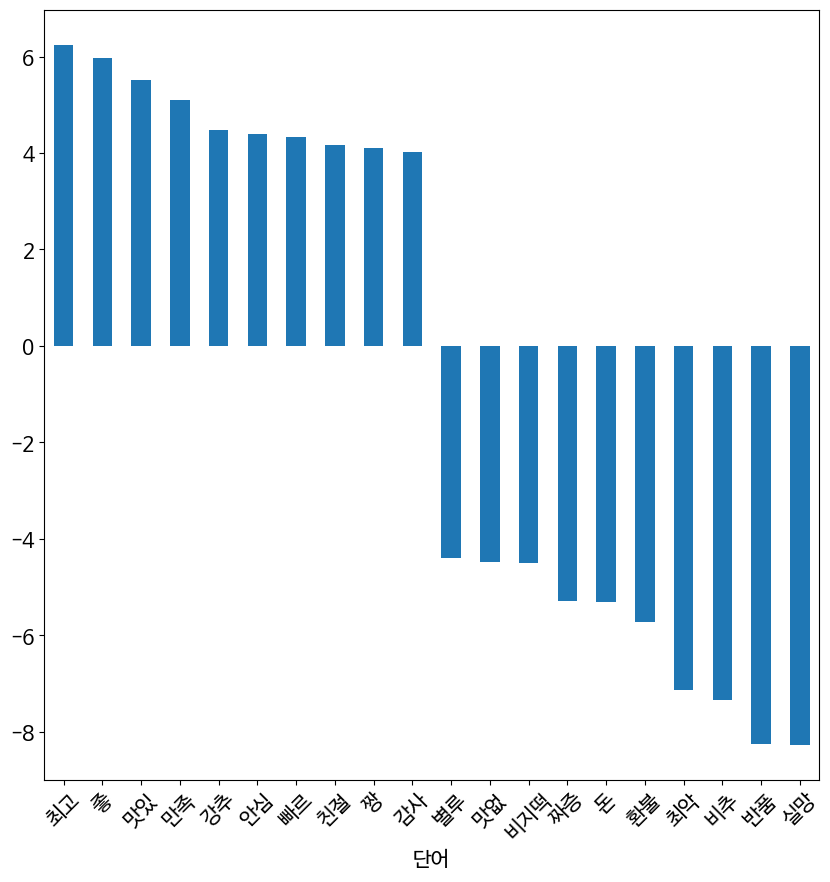

In [136]:
pd.concat([naver_pos, naver_neg]).set_index('단어')['가중치'].plot(kind='bar',
                                                              rot=45)

In [137]:
keyword = "비추"
rs = w2v.wv.most_similar(keyword, topn=20)
rs

[('절대', 0.8229431509971619),
 ('구림', 0.7831625938415527),
 ('사지', 0.7553690671920776),
 ('비지떡', 0.7333753705024719),
 ('꽝', 0.721081554889679),
 ('값어치', 0.7122835516929626),
 ('고', 0.7039017677307129),
 ('허접', 0.6982399225234985),
 ('결론', 0.6974095106124878),
 ('별루', 0.6898685097694397),
 ('마이너스', 0.687437891960144),
 ('안들', 0.6794722676277161),
 ('드럽', 0.6770723462104797),
 ('쓰레기', 0.6766940951347351),
 ('최악', 0.6747642755508423),
 ('주고', 0.6744028925895691),
 ('세상', 0.6728464961051941),
 ('쓸모없', 0.6727412343025208),
 ('조잡', 0.6719304323196411),
 ('극치', 0.671564519405365)]

In [141]:
# 연관어의 긍정/부정 가중치 추출
rs_df = pd.DataFrame(rs)
tmp = naver_df.set_index('단어').loc[rs_df[0]]  # 단어를 인덱스로 설정 / rs_df[0]와 일치하는 행 선택
tmp['sentiment'] = np.where(abs(tmp['가중치']) <= 1, 'Neutral',
                            np.where(tmp['가중치'] > 0, 'Positive', 'Negative'))
tmp

,인덱스,가중치,sentiment
단어,,,
절대,13239,-1.974819,Negative
구림,1520,-1.765982,Negative
사지,7474,-0.528386,Neutral
비지떡,7194,-4.511062,Negative
꽝,2289,-3.132542,Negative
값어치,396,-0.731698,Neutral
고,964,-0.131954,Neutral
허접,17218,-2.726094,Negative
결론,829,-1.248489,Negative


In [142]:
# 노트북 안에서 그림이 그려지게 함
net = Network(notebook=True, cdn_resources='in_line')
net.add_node(keyword, color="white", shape="database")

color = {"Neutral":"#D5D5D5", "Negative":"#FFA7A7", "Positive":"#B2CCFF"}

for (word, sim), sent in zip(rs, tmp['sentiment']):
  net.add_node(word, color=color[sent], shape='box')
  net.add_edge(word, keyword, value=sim)

net.save_graph('my_sentiment_map.html')

In [143]:
HTML(filename="my_sentiment_map.html")

### 문서 연관성

#### 빈도기반
- BOW, Tf-idf를 이용해 수치화하여 유사도 계산

#### Document Embedding
- Document Embedding을 이용해 문서의 특징을 수치화하고 유사도를 계산
- Doc2Vec, Sentence Transformer 등
- 특정 문서에서 단어들이 나열되어 있으면, 주변 단어들을 넣어서 중심을 맞춘다
- 문서의 고유 id값을 넣는다 -> 문서에 대해 수치화 할 수 있다(차별성)

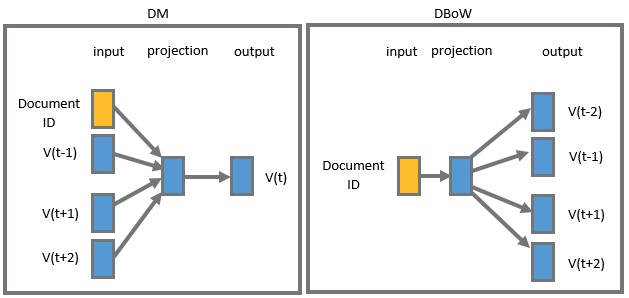

In [ ]:
dart_data = pd.read_csv("./data/dart.csv")
dart_data.head()

In [ ]:
# 결측치 삭제
dart_data.dropna(inplace=True)

In [ ]:
dart_data.shape

In [ ]:
business = dart_data['business']
name = dart_data['name']

In [ ]:
# 기업의 전자공시 텍스트 데이터를 형태소 단위로 분리
business_morphs = []
for doc in tqdm(business):
  rs = mecab.morphs(doc)
  business_morphs.append(rs)

In [107]:
from gensim.models.doc2vec import TaggedDocument # Doc2vec에 학습시키기위해 사용하는 클래스
from gensim.models.doc2vec import Doc2Vec

In [ ]:
# import pickle
# with open("./data/business_morphs.pkl", 'rb') as f :
#     business_morphs = pickle.load(f)

In [ ]:
business_data_for_d2v = [] # doc2vec을 위한 전체데이터가 들어갈 리스트
for doc,n in zip(business_morphs,name) :
    obj = TaggedDocument(tags=[n], words=doc) # 기업명하고 공시텍스트를 하나로 묶어줌
    business_data_for_d2v.append(obj)

In [ ]:
model = Doc2Vec(vector_size=300, # 문서를 수치화할때 사용할 숫자의 크기
               alpha=0.025, # 학습률
               min_alpha=0.025, # 학습률 감소비율,
               window=8) # 학습시 다음단어를 맞추기 위한 입력단어의 갯수

In [ ]:
# 사용하는 단어사전 구축
model.build_vocab(business_data_for_d2v)

In [ ]:
# 사용하는 문서의 수 확인
model.corpus_count

In [ ]:
# 학습 (15~20분)
model.train(business_data_for_d2v, # 학습에 사용할 문서데이터 셋
           total_examples=model.corpus_count, # 전체 사용하는 문서의 수
           epochs=20) # 업데이트 횟수

In [ ]:
# 모델 저장
model.save('dart.doc2vec')

In [108]:
# 모델 로딩
model = Doc2Vec.load("./data/dart.doc2vec")

In [109]:
# Doc2vec의 유사도계산 함수 -> tags에 넣은 문서명을 기준으로 유사도비교 실시
model.dv.most_similar("카카오게임즈")

[('액토즈소프트', 0.6306300163269043),
 ('썸에이지', 0.621350109577179),
 ('네오위즈', 0.6005937457084656),
 ('위메이드', 0.5982935428619385),
 ('넵튠', 0.5950884222984314),
 ('넷마블', 0.59349125623703),
 ('펄어비스', 0.5860568881034851),
 ('넷게임즈', 0.5860407948493958),
 ('더블유게임즈', 0.5844870805740356),
 ('넥슨지티', 0.5844324231147766)]

#### 토픽모델링(LDA)
- 추출한 문서에 담긴 단어들의 주제(토픽)을 추출
- 클러스터링을 활용